<a href="https://colab.research.google.com/github/rafachoks/data-study/blob/master/Data_Models_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

In [ ]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Base Risco Crédito

In [ ]:
credit_risk = pd.read_csv('risco_credito.csv')
credit_risk

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_risco_credito = credit_risk.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
Y_risco_credito = credit_risk.iloc[:, 4].values
Y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:, 0] = label_enconder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:, 1] = label_enconder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:, 2] = label_enconder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:, 3] = label_enconder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, Y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()

In [ ]:
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)
naive_risco_credito

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_ , naive_risco_credito.class_prior_, naive_risco_credito.classes_

(array([6., 5., 3.]),
 array([0.42857143, 0.35714286, 0.21428571]),
 array(['alto', 'baixo', 'moderado'], dtype='<U8'))

### Base Credit - 94%

In [ ]:
with open(r"credit.pkl", "rb") as f:
    X_credit_train, Y_credit_train, X_credit_test, Y_credit_test = pickle.load(f)

In [ ]:
X_credit_train.shape, Y_credit_train.shape, X_credit_teste.shape, Y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, Y_credit_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsores = naive_credit.predict(X_credit_test)

In [ ]:
accuracy_score(Y_credit_test, previsores)

0.938

In [ ]:
confusion_matrix(Y_credit_test, previsores)

array([[428,   8],
       [ 23,  41]])

In [ ]:
print(classification_report(Y_credit_test, previsores))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base Census - 48%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_train, Y_census_train, X_census_test, Y_census_test = pickle.load(f)

In [ ]:
X_census_train.shape, Y_census_train.shape, X_census_test.shape, Y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_train, Y_census_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predict = naive_census.predict(X_census_test)

In [ ]:
accuracy_score(Y_census_test, predict)

0.4767656090071648

In [ ]:
confusion_matrix(Y_census_test, predict)

array([[1172, 2521],
       [  35, 1157]])

In [ ]:
print(classification_report(Y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Tree Decision

### Base Risco Crédito

In [10]:
import pickle
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
with open('risco_credito.pkl', 'rb') as f:
  X_risk_credit, Y_risk_credit,  = pickle.load(f)

In [4]:
X_risk_credit.shape, Y_risk_credit.shape

((14, 4), (14,))

In [6]:
Y_risk_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [8]:
tree_risk_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_risk_credit.fit(X_risk_credit, Y_risk_credit)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(279.0, 489.24, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(111.6, 380.52000000000004, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(55.8, 271.8, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(167.39999999999998, 271.8, 'historia <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(111.6, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(223.2, 163.08000000000004, 'divida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(279.0, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(446.4, 380.52000000000004, 'historia <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(390.59999999999997, 271.8, 'historia <=

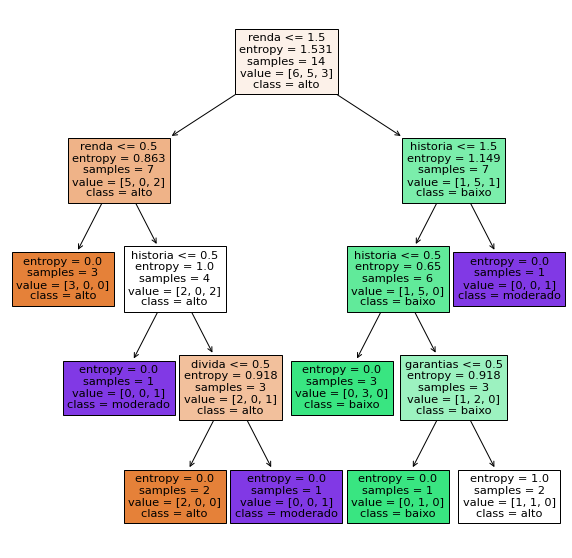

In [11]:
label = ['historia', 'divida', 'garantias', 'renda']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(tree_risk_credit, feature_names=label, class_names=tree_risk_credit.classes_, filled=True)


In [13]:
previsores = tree_risk_credit.predict([[0,0,1,2],[2,0,0,0]])
previsores

array(['baixo', 'alto'], dtype=object)

### Base credit - 98%

In [14]:
with open("credit.pkl", "rb") as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [15]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [16]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [17]:
tree_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_credit.fit(X_credit_treinamento, Y_credit_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
predicts = tree_credit.predict(X_credit_teste)
predicts

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
accuracy_score(Y_credit_teste, predicts)

0.982

In [20]:
confusion_matrix(Y_credit_teste, predicts)

array([[430,   6],
       [  3,  61]])

In [21]:
print(classification_report(Y_credit_teste, predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



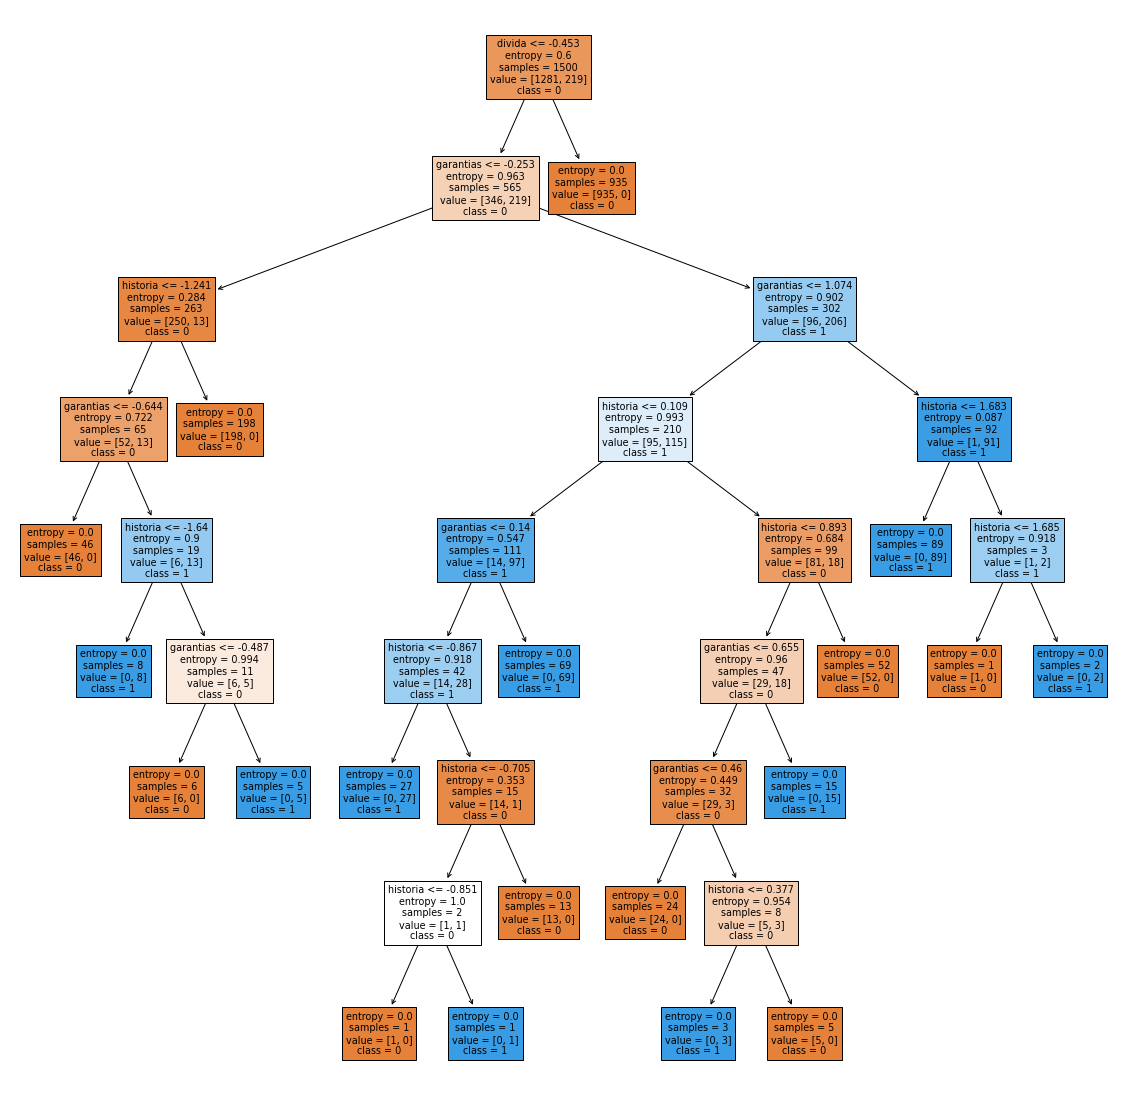

In [24]:
labels = ['income', 'age', 'loan']
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(tree_credit, feature_names=label, class_names=["0","1"], filled=True)
fig.savefig('tree_credit.png')

### Base Census - 81%


In [25]:
with open("census.pkl","rb") as f:
    X_census_train, Y_census_train, X_census_test, Y_census_test = pickle.load(f)

In [29]:
X_census_train.shape, Y_census_train.shape, X_census_test.shape, Y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [30]:
tree_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_census.fit(X_census_train, Y_census_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
predicts = tree_census.predict(X_census_test)
predicts

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [33]:
accuracy_score(Y_census_test, predicts)

0.8104401228249745

In [34]:
confusion_matrix(Y_census_test, predicts)

array([[3227,  466],
       [ 460,  732]])

In [35]:
print(classification_report(Y_census_test, predicts))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Rules

In [ ]:
#!pip install Orange3

In [ ]:
import Orange

###Base Risco de Crédito

In [ ]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.CN2Learner()
regras_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [ ]:
previsoes = regras_credito([['boa','alta','nenhuma', 'acima_35'], ['ruim','alta','adequada', '0_15']])
previsoes

array([1, 0])

In [ ]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [ ]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


### Base Credit - 98% 



In [ ]:
base_credit = Orange.data.Table('credit_data_regras.csv')
base_credit

[[66155.9, 59.017, 8106.53 | 0],
 [34415.2, 48.1172, 6564.75 | 0],
 [57317.2, 63.108, 8020.95 | 0],
 [42709.5, 45.752, 6103.64 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
base_divida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_divida

([[68827.2, 25.3025, 1049.18 | 0],
  [31657.6, 37.7787, 1448.07 | 0],
  [60567.4, 40.0412, 571.933 | 0],
  [60016.7, 22.7386, 1522.65 | 0],
  [54423, 58.5714, 444.614 | 0],
  ...
 ], [[53825.4, 45.3567, 431.45 | 0],
  [25640.1, 22.6565, 3105.44 | 1],
  [62498.5, 31.9097, 3312.88 | 0],
  [63062, 39.2016, 1850.37 | 0],
  [65689.2, 28.1087, 255.073 | 0],
  ...
 ])

In [ ]:
base_treinamento = base_divida[1]
base_teste = base_divida[0]

In [ ]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2507.64970973955 AND income>=20145.9885970689 THEN default=0 
IF loan>=7708.31562497011 AND age>=20.9909665295854 THEN default=1 
IF income>=55858.5492358543 AND loan>=8402.415585756991 THEN default=1 
IF income>=58132.4712652713 THEN default=0 
IF loan>=6016.61509078929 AND age>=23.1489815721288 THEN default=1 
IF loan>=6525.21842259918 THEN default=1 
IF income>=48790.1324336417 THEN default=0 
IF income<=31722.7309499867 AND loan>=3360.0594135198903 THEN default=1 
IF income<=22089.8374845274 AND age>=21.3656869572587 THEN default=1 
IF loan<=4849.33378471958 AND income>=37162.8882177174 THEN default=0 
IF age>=34.7410444347188 THEN default=0 
IF loan<=4367.26495019919 AND income>=33093.9618567936 THEN default=0 
IF income<=32720.504798926402 AND loan>=4367.26495019919 THEN default=1 
IF income<=33265.7905458473 AND loan>=5968.4420381087 THEN default=1 
IF income<=33436.4890051074 AND loan>=5473.98555060076 THEN default=1 
IF income<

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.98])